
# Project: Investigate a Dataset - FBI NICS Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project, I will endeavor to demonstrate my ability to appropriately use NumPy, Pandas and Matplotlib to explore a dataset.  I chose the FBI NICS data because given the current civil unrest in United States, the opportunity sounded most intriguing.
> I will use the following questions to guide my exploration of the datasets:
1. Has the most frequent type of check changed over time?
2. Is there a relationship between a state's population and the number of checks--is there a state with an especially disproprotionate amount of checks?
3. Is there a relationship between median gross rent and the amount of checks?
4. Is there a stronger relationship between the number of women-owned firms or men-owned firms and the amount of checks?
5. Do any of my selected data have a strong correlation

In [67]:
# Import packages for analyzing data: pandas, Numpy, Seaborn, and Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [68]:
# Load NICS and census data
guns = pd.read_csv('gun_data.csv')
census = pd.read_csv('U.S. Census Data.csv')

In [69]:
# Explore NICS dataset
guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


Before viewing this dataset, I was not familiar with some of the terminology.  I consulted the Federal Bureau of Investigation National Instant Criminal Background Check System (NICS) Echeck Help page and "NICS Firearm Checks - Month/Year by State and Type" PDF to understand the vocabulary used in the column headers.  A handgun is meant to be held and fired from hand, such as revolvers and pistols.  A long gun requires the support of the shoulder, such as rifles, carbines, shotguns, muskets, blunderbusses, submachine guns, personal defense weapons, wall guns, and musketoons.  "Other" refers to frames, receivers, and other firearms that are neither handguns nor long guns, such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.

A prepawn is a check performed prior to a pawnbroker accepting a firearm, and a redemption is a check ran upon reclaiming a firearm from the pawnbroker.

Most importantly, each check is not indicative of a sale.

In [70]:
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

It makes sense that given different laws and regions, we would see null values for some columns for some states in a given time.  I do not suspect that we will have to trim on this basis, but it will make sense to fill those nulls with zeros.  Converting floats to integers will likely make sense.

In [71]:
guns.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,10545.000000,10544.000000,5115.000000,2200.000000,2145.000000,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,783.467053,952.144809,4.574641,81.943020,22.097046,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,39.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,561.000000,872.000000,2.000000,16.000000,4.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,603.000000,168.000000,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [72]:
#explore census dataset
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [73]:
#What are all the "Facts"
print(census['Fact'])

0          Population estimates, July 1, 2016,  (V2016)
1     Population estimates base, April 1, 2010,  (V2...
2     Population, percent change - April 1, 2010 (es...
3                     Population, Census, April 1, 2010
4     Persons under 5 years, percent, July 1, 2016, ...
5         Persons under 5 years, percent, April 1, 2010
6     Persons under 18 years, percent, July 1, 2016,...
7        Persons under 18 years, percent, April 1, 2010
8     Persons 65 years and over, percent,  July 1, 2...
9     Persons 65 years and over, percent, April 1, 2010
10     Female persons, percent,  July 1, 2016,  (V2016)
11               Female persons, percent, April 1, 2010
12         White alone, percent, July 1, 2016,  (V2016)
13    Black or African American alone, percent, July...
14    American Indian and Alaska Native alone, perce...
15         Asian alone, percent, July 1, 2016,  (V2016)
16    Native Hawaiian and Other Pacific Islander alo...
17    Two or More Races, percent, July 1, 2016, 

While I am intrigued by how each of these variables might relate to the NICS data, it would probably be best to narrow my scope.  I also think it will be helpful to transpose the table to make the rows go by state as in the NICS data.

In [74]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

What are FIPS?
Federal Information Processing Standards (FIPS), now known as Federal Information Processing Series, are numeric codes assigned by the National Institute of Standards and Technology (NIST). Typically, FIPS codes deal with US states and counties. US states are identified by a 2-digit number, while US counties are identified by a 3-digit number. For example, a FIPS code of 06071, represents California -06 and San Bernardino County -071.
https://support.esri.com/en/technical-article/000002594

It appears likely I can drop at least the last 15 rows of the Fact column with little/no impact on my exploration.  All the data is stored as strings/objects and will need to be converted to floats or integers.

### Data Cleaning

In [75]:
#Transpose census table so that rows are states as in the NICS data
tcensus = np.transpose(census)

In [76]:
#Confirm that the function produced desired effect
tcensus.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July...","American Indian and Alaska Native alone, perce...","Asian alone, percent, July 1, 2016, (V2016)",Native Hawaiian and Other Pacific Islander alo...,"Two or More Races, percent, July 1, 2016, (V2...","Hispanic or Latino, percent, July 1, 2016, (V...","White alone, not Hispanic or Latino, percent, ...","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, ...",Median selected monthly owner costs -with a mo...,Median selected monthly owner costs -without a...,"Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of pe...","Language other than English spoken at home, pe...","High school graduate or higher, percent of per...","Bachelor's degree or higher, percent of person...","With a disability, under age 65 years, percent...","Persons without health insurance, under age 6...","In civilian labor force, total, percent of pop...","In civilian labor force, female, percent of po...","Total accommodation and food services sales, 2...",Total health care and social assistance receip...,"Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers ag...","Median household income (in 2015 dollars), 201...",Per capita income in past 12 months (in 2015 d...,"Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,NaN,NOTE: FIPS Code values are enclosed in quotes ...,NaN,Value Notes,1,NaN,Fact Notes,(a),(b),(c),NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(a),(a),(a),(a),(a),NaN,(b),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(c),(c),(c),(c),(c),(c),NaN,NaN,NaN,NaN,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Includes data not distributed by county.,NaN,NaN,Includes persons reporting only one race,"Hispanics may be of any race, so also are incl...",Economic Census - Puerto Rico data are not com...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not app

The former index are now column headings--that will need to be fixed, but might make eliminating some columns easier for now.

In [77]:
#Drop extraneous columns
tcensus.drop([1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], axis=1, inplace=True)

In [78]:
#Confirm desired columns remain
tcensus.head()

,0,2,3,28,34,35,41,49,56,57,62
Fact,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Median gross rent, 2011-2015","High school graduate or higher, percent of per...","Bachelor's degree or higher, percent of person...",Total health care and social assistance receip...,"Persons in poverty, percent","Men-owned firms, 2012","Women-owned firms, 2012","Population per square mile, 2010"
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,(c),NaN,NaN,NaN,NaN
Alabama,"4,863,300",1.70%,"4,779,736",$717,84.30%,23.50%,"26,039,632",17.10%,"203,604","137,630",94.4
Alaska,"741,894",4.50%,"710,231","$1,146",92.10%,28.00%,"6,375,483",9.90%,"35,402","22,141",1.2
Arizona,"6,931,071",8.40%,"6,392,017",$913,86.00%,27.50%,"37,055,881",16.40%,"245,243","182,425",56.3


In [79]:
#make fact row header row
tcensus.columns = tcensus.iloc[0]

In [80]:
#drop the fact note row, save
tcensus.dropna(inplace=True)
tcensus.to_csv('tcensus.csv')

In [81]:
tcensus1 = pd.read_csv('tcensus.csv')
tcensus1.head()

,Unnamed: 0,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Median gross rent, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Persons in poverty, percent","Men-owned firms, 2012","Women-owned firms, 2012","Population per square mile, 2010"
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Median gross rent, 2011-2015","High school graduate or higher, percent of per...","Bachelor's degree or higher, percent of person...",Total health care and social assistance receip...,"Persons in poverty, percent","Men-owned firms, 2012","Women-owned firms, 2012","Population per square mile, 2010"
1,Alabama,"4,863,300",1.70%,"4,779,736",$717,84.30%,23.50%,"26,039,632",17.10%,"203,604","137,630",94.4
2,Alaska,"741,894",4.50%,"710,231","$1,146",92.10%,28.00%,"6,375,483",9.90%,"35,402","22,141",1.2
3,Arizona,"6,931,071",8.40%,"6,392,017",$913,86.00%,27.50%,"37,055,881",16.40%,"245,243","182,425",56.3
4,Arkansas,"2,988,248",2.50%,"2,915,918",$677,84.80%,21.10%,"15,792,628",17.20%,"123,158","75,962",56


In [82]:
# Drop fact row since it now serves as the header row
tcensus1.drop([0], inplace=True)
tcensus1.reset_index(drop=True, inplace=True)

In [83]:
tcensus1.head()

,Unnamed: 0,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Median gross rent, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Persons in poverty, percent","Men-owned firms, 2012","Women-owned firms, 2012","Population per square mile, 2010"
0,Alabama,"4,863,300",1.70%,"4,779,736",$717,84.30%,23.50%,"26,039,632",17.10%,"203,604","137,630",94.4
1,Alaska,"741,894",4.50%,"710,231","$1,146",92.10%,28.00%,"6,375,483",9.90%,"35,402","22,141",1.2
2,Arizona,"6,931,071",8.40%,"6,392,017",$913,86.00%,27.50%,"37,055,881",16.40%,"245,243","182,425",56.3
3,Arkansas,"2,988,248",2.50%,"2,915,918",$677,84.80%,21.10%,"15,792,628",17.20%,"123,158","75,962",56
4,California,"39,250,017",5.40%,"37,253,956","$1,255",81.80%,31.40%,"248,953,592",14.30%,"1,852,580","1,320,085",239.1


In [84]:
#shorten column names
tcensus1.rename(columns = {'Unnamed: 0':'state', 'Population estimates, July 1, 2016,  (V2016)':'est_pop_72016', 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)':'pop_change', 'Population, Census, April 1, 2010':'pop_42010', 'Median gross rent, 2011-2015':'median_rent_2011-2015', 'High school graduate or higher, percent of persons age 25 years+, 2011-2015':'25_hsgrads_2011-2015', "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015":'25_colgrads_2011-2015', 'Total health care and social assistance receipts/revenue, 2012 ($1,000)':'total_assist_2012x1000', 'Persons in poverty, percent':'poverty', 'Men-owned firms, 2012':'men_firms_2012', 'Women-owned firms, 2012':'women_firms_2012', 'Population per square mile, 2010':'pop_sqmi_2010'}, inplace=True)

In [85]:
#get rid of commas, '$' and '%'
tcensus1 = tcensus1.stack().str.replace(',','').unstack()
tcensus1 = tcensus1.stack().str.replace('%','').unstack()
tcensus1 = tcensus1.stack().str.replace('$','').unstack()
#confirm changes
tcensus1.head()

,state,est_pop_72016,pop_change,pop_42010,median_rent_2011-2015,25_hsgrads_2011-2015,25_colgrads_2011-2015,total_assist_2012x1000,poverty,men_firms_2012,women_firms_2012,pop_sqmi_2010
0,Alabama,4863300,1.70,4779736,717,84.30,23.50,26039632,17.10,203604,137630,94.4
1,Alaska,741894,4.50,710231,1146,92.10,28.00,6375483,9.90,35402,22141,1.2
2,Arizona,6931071,8.40,6392017,913,86.00,27.50,37055881,16.40,245243,182425,56.3
3,Arkansas,2988248,2.50,2915918,677,84.80,21.10,15792628,17.20,123158,75962,56
4,California,39250017,5.40,37253956,1255,81.80,31.40,248953592,14.30,1852580,1320085,239.1


In [86]:
#convert to integers
tcensus1[['est_pop_72016', 'pop_change', 'pop_42010', 'median_rent_2011-2015', '25_hsgrads_2011-2015', '25_colgrads_2011-2015', 'total_assist_2012x1000', 'poverty', 'men_firms_2012', 'women_firms_2012', 'pop_sqmi_2010']] = tcensus1[['est_pop_72016', 'pop_change', 'pop_42010', 'median_rent_2011-2015', '25_hsgrads_2011-2015', '25_colgrads_2011-2015', 'total_assist_2012x1000', 'poverty', 'men_firms_2012', 'women_firms_2012', 'pop_sqmi_2010']].apply(pd.to_numeric)
tcensus1[['est_pop_72016', 'pop_change', 'pop_42010', 'median_rent_2011-2015', '25_hsgrads_2011-2015', '25_colgrads_2011-2015', 'total_assist_2012x1000', 'poverty', 'men_firms_2012', 'women_firms_2012', 'pop_sqmi_2010']] = tcensus1[['est_pop_72016', 'pop_change', 'pop_42010', 'median_rent_2011-2015', '25_hsgrads_2011-2015', '25_colgrads_2011-2015', 'total_assist_2012x1000', 'poverty', 'men_firms_2012', 'women_firms_2012', 'pop_sqmi_2010']].astype(int)

In [87]:
#confirm changes
tcensus1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 12 columns):
state                     50 non-null object
est_pop_72016             50 non-null int64
pop_change                50 non-null int64
pop_42010                 50 non-null int64
median_rent_2011-2015     50 non-null int64
25_hsgrads_2011-2015      50 non-null int64
25_colgrads_2011-2015     50 non-null int64
total_assist_2012x1000    50 non-null int64
poverty                   50 non-null int64
men_firms_2012            50 non-null int64
women_firms_2012          50 non-null int64
pop_sqmi_2010             50 non-null int64
dtypes: int64(11), object(1)
memory usage: 5.1+ KB


In [88]:
tcensus1.shape

(50, 12)

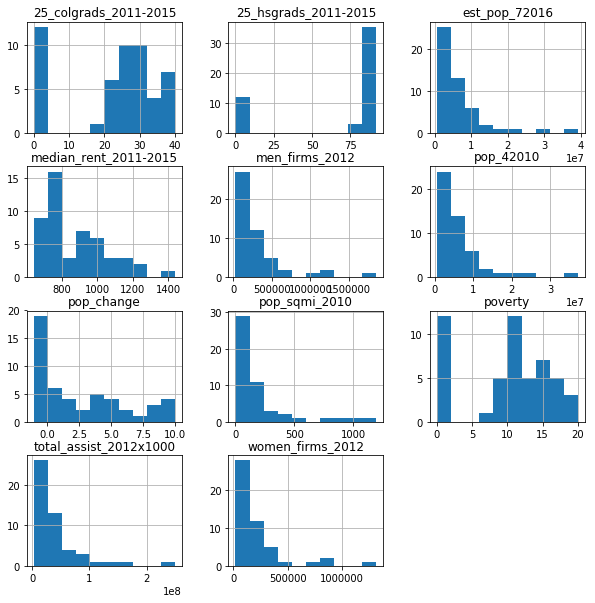

In [89]:
#Seems good!
tcensus1.hist(figsize=(10,10));

In [90]:
#Now for the NICS data:
#fill nulls with zeros
#convert floats to ints
guns.fillna(0, inplace=True)
guns[['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals']] = guns[['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals']].astype(int)

In [91]:
#confirm changes
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null int64
permit_recheck               12485 non-null int64
handgun                      12485 non-null int64
long_gun                     12485 non-null int64
other                        12485 non-null int64
multiple                     12485 non-null int64
admin                        12485 non-null int64
prepawn_handgun              12485 non-null int64
prepawn_long_gun             12485 non-null int64
prepawn_other                12485 non-null int64
redemption_handgun           12485 non-null int64
redemption_long_gun          12485 non-null int64
redemption_other             12485 non-null int64
returned_handgun             12485 non-null int64
returned_long_gun            12485 non-null int64
returned_other               12485 non-

In [92]:
#create year column to get to an annual rate per state
guns['year'] = guns['month'].str[:4]
guns['year'] = guns['year'].astype(int)

In [93]:
#eliminate years that don't overlap with census data
guns = guns[(guns['year'] >= 2010) & (guns['year'] <= 2016)]

In [94]:
#now group for totals by state and year
nics = guns.groupby(['state','year']).sum()

In [95]:
#save clean grouped data
tcensus1.to_csv('tcensus1.csv')
nics.to_csv('nics.csv')

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  Has the most frequent type of check changed over time?

In [96]:
#get all data for 2010 and 2016
df_10_16 = nics.query('year in [2010, 2016]')
df_10 = nics.query('year == 2010')
df_16 = nics.query('year == 2016')

In [97]:
#view maximums
df_10.max()

permit                       2149338
permit_recheck                     0
handgun                       344377
long_gun                      622368
other                           7744
multiple                       28094
admin                           5468
prepawn_handgun                  611
prepawn_long_gun                 781
prepawn_other                      6
redemption_handgun             51387
redemption_long_gun            61812
redemption_other                  98
returned_handgun                   0
returned_long_gun                  0
returned_other                     0
rentals_handgun                    0
rentals_long_gun                   0
private_sale_handgun               0
private_sale_long_gun              0
private_sale_other                 0
return_to_seller_handgun           0
return_to_seller_long_gun          0
return_to_seller_other             0
totals                       2385579
dtype: int64

In [98]:
df_16.max()

permit                       3372613
permit_recheck                419341
handgun                       662308
long_gun                      554550
other                         211707
multiple                       33102
admin                           1704
prepawn_handgun                  455
prepawn_long_gun                 349
prepawn_other                     23
redemption_handgun             78877
redemption_long_gun            57477
redemption_other                 470
returned_handgun                5742
returned_long_gun               1429
returned_other                   401
rentals_handgun                   11
rentals_long_gun                  16
private_sale_handgun            6669
private_sale_long_gun           5472
private_sale_other               382
return_to_seller_handgun          89
return_to_seller_long_gun        104
return_to_seller_other            17
totals                       3676847
dtype: int64

Background checks for permits are the most frequent in both years, but handguns and long guns flipped as the next most frequent.  Let's visualize.

In [99]:
#set so we can see across all columns
pd.set_option('display.max_columns', None)

#see states and years with the most permits background checks
df_10_16.nlargest(10, 'permit')

permit  permit_recheck  handgun  long_gun   other  \
state          year                                                       
Kentucky       2016  3372613               0   140721    109030    3886   
               2010  2149338               0    84311     99910    1177   
California     2016  1036981               0   560355    554550  211707   
Illinois       2016   962930          419341   352411    177255       0   
Indiana        2016   946912               0   278182    177218   17764   
Utah           2010   481563               0    28442     41495       0   
Illinois       2010   463699               0   109204    116746       1   
Texas          2016   390462               0   637476    481609   40329   
Minnesota      2016   350315               0   133962    143543   10289   
North Carolina 2016   345364               0    16595    176919    9886   

                     multiple  admin  prepawn_handgun  prepawn_long_gun  \
state          year                                                       
Kentucky       2016      6943      2              118               117   
               2010      5893     66               96               154   
California     2016         0      0                0                 0   
Illinois       2016     12133      0                0                 0   
Indiana        2016      9082     90               21                41   
Utah           2010      1634      0                0                 0   
Illinois       2010      5650      0                0                 0   
Texas          2016     33102      0              455               349   
Minnesota      2016      5046      0               14                30   
North Carolina 2016      2812      0              134               158   

                     prepawn_other  redemption_handgun  redemption_long_gun  \
state          year                                                           
Kentucky       2016              9               20946                22117   
               2010              2               17445                27164   
California     2016              0                6752                 6645   
Illinois       2016              0                   0                    0   
Indiana        2016              4                 374                 6380   
Utah           2010              0                   0                    0   
Illinois       2010              0                   0                    0   
Texas          2016             23               78877                57477   
Minnesota      2016              0                2589                 5277   
North Carolina 2016              6               22656                26577   

                     redemption_other  returned_handgun  returned_long_gun  \
state          year                                                          
Kentucky       2016                74                45                 25   
               2010                23                 0                  0   
California     2016               177                 0                  0   
Illinois       2016                 0                 0                  0   
Indiana        2016                88               165                  1   
Utah           2010                 0                 0                  0   
Illinois       2010                 0                 0                  0   
Texas          2016               470               391                 34   
Minnesota      2016               153               125                 78   
North Carolina 2016               115                 1                  0   

                     returned_other  rentals_handgun  rentals_long_gun  \
state          year                                                      
Kentucky       2016               0                0                 0   
               2010               0                0                 0   
California     2016               0   

In [100]:
#locate the maximum for each column
df_10_16.idxmax()

permit                           (Kentucky, 2016)
permit_recheck                   (Illinois, 2016)
handgun                           (Florida, 2016)
long_gun                     (Pennsylvania, 2010)
other                          (California, 2016)
multiple                            (Texas, 2016)
admin                             (Florida, 2010)
prepawn_handgun                     (Texas, 2010)
prepawn_long_gun                     (Ohio, 2010)
prepawn_other                       (Texas, 2016)
redemption_handgun                  (Texas, 2016)
redemption_long_gun                 (Texas, 2010)
redemption_other                    (Texas, 2016)
returned_handgun             (Pennsylvania, 2016)
returned_long_gun              (Washington, 2016)
returned_other                       (Utah, 2016)
rentals_handgun                  (New York, 2016)
rentals_long_gun                 (New York, 2016)
private_sale_handgun           (Washington, 2016)
private_sale_long_gun          (Washington, 2016)


Kentucky had a lead that grew.  Kentucky has the most permits-related checks and the overall most checks.

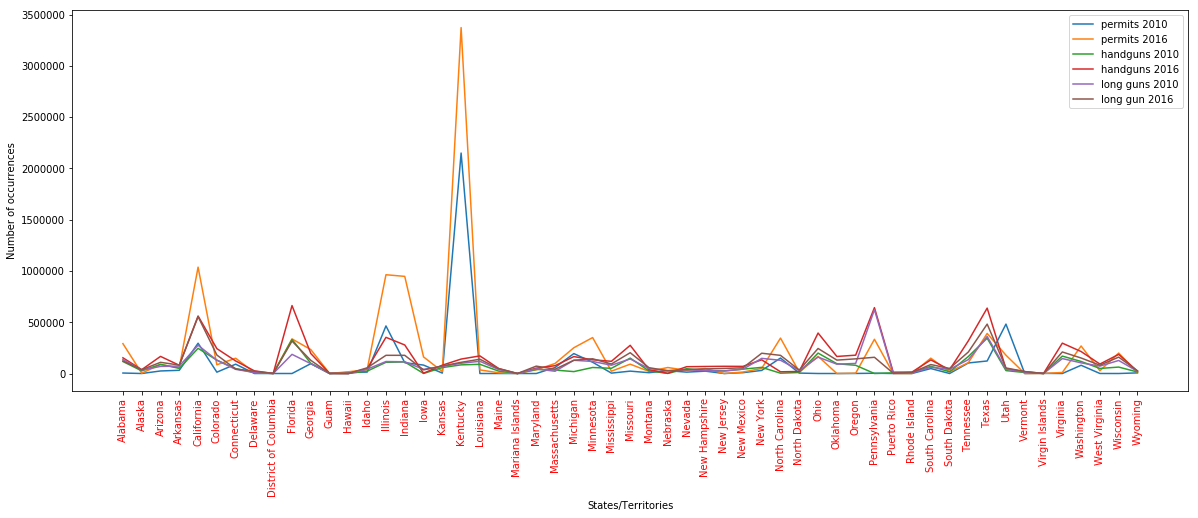

In [101]:
# plot data
fig, ax = plt.subplots(figsize=(20,7))
# use unstack()
df_10_16['permit'].unstack().plot(ax=ax)
df_10_16['handgun'].unstack().plot(ax=ax)
df_10_16['long_gun'].unstack().plot(ax=ax)
#add labels, title, and legend
ax.set_xlabel('States/Territories')
ax.set_ylabel('Number of occurrences')
arr = ['permits 2010', 'permits 2016', 'handguns 2010', 'handguns 2016', 'long guns 2010', 'long gun 2016'];
plt.legend(arr)
plt.xticks(range(55), ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], color='red', rotation=90);

Permits- or handgun-related checks seem to be the most frequent increase across states from 2010-2016.  Florida, Missouri, Ohio, Pennsylvania, Texas, and Virginia most obviously have other check types outpacing the permits. Utah went against the trend with a significant decrease in the permits-related checks.

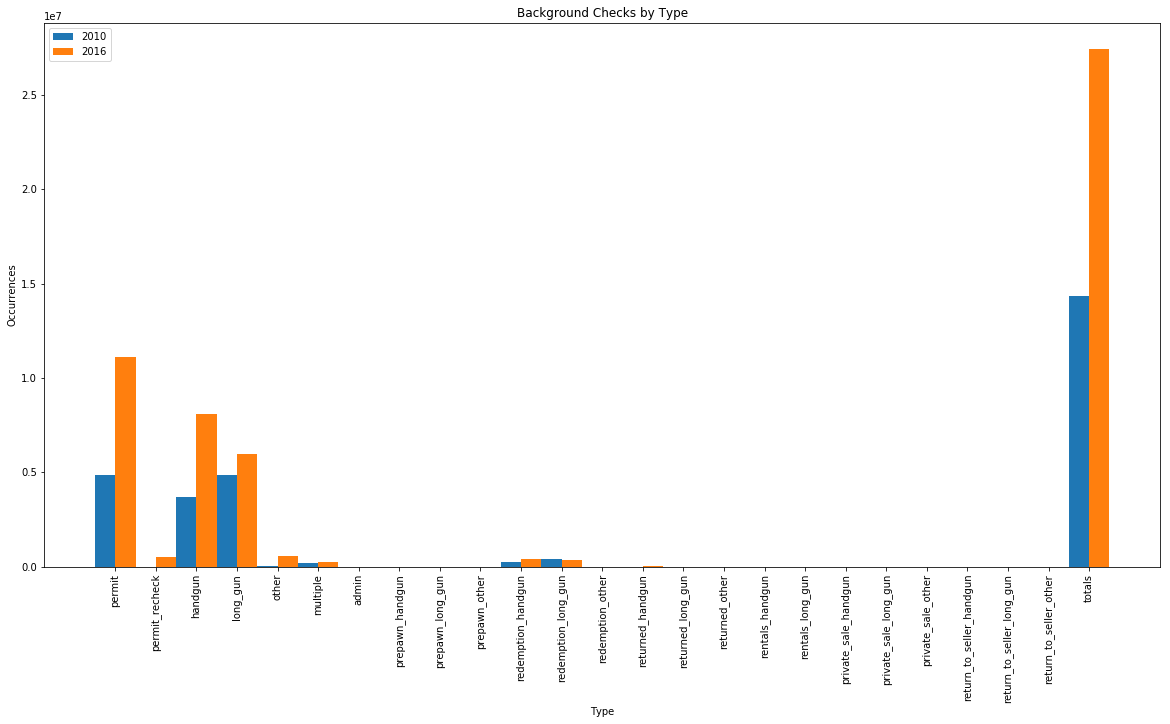

In [102]:
#look at the totals per type, versus total per year/state
labels = ['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals']

x = np.arange(len(labels))  # the label locations
width = 0.50  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, (df_10.sum(numeric_only=True, axis=0)), width, label='2010')
rects2 = ax.bar(x + width/2, (df_16.sum(numeric_only=True, axis=0)), width, label='2016')

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Occurrences')
ax.set_xlabel('Type')
ax.set_title('Background Checks by Type')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.show()

Background checks grew, with a signifcant increase in those related to permits and handguns.

### Research Question 2:  Is there a relationship between a state's population and the number of checks--is there a state with an especially disproprotionate amount of checks?

In [103]:
#drop territories not represented by the census dataset, as well as "States" column so that it lines up with NICs data
df_16_50 = df_16.drop(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'], level=0)

In [104]:
#confirm there are 50 rows
df_16_50.shape 

(50, 25)

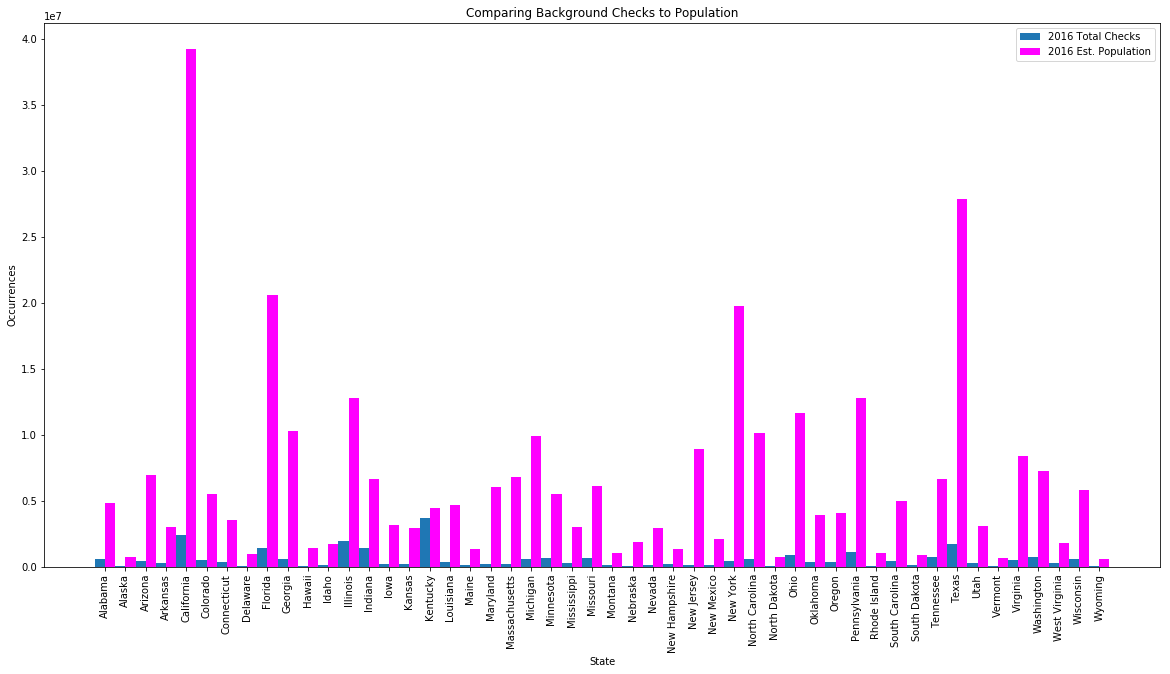

In [105]:
#line up state data for checks with population
labels = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

x = np.arange(len(labels))  # the label locations
width = 0.50  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))

rects1 = ax.bar(x - width/2, (df_16_50['totals']), width, label='2016 Total Checks')
rects2 = ax.bar(x + width/2, (tcensus1['est_pop_72016']), width, label='2016 Est. Population', color='magenta')

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Occurrences')
ax.set_xlabel('State')
ax.set_title('Comparing Background Checks to Population')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.show()

Kentucky is an interesting case again!  Their checks are relatively disproportionate to their polulation.

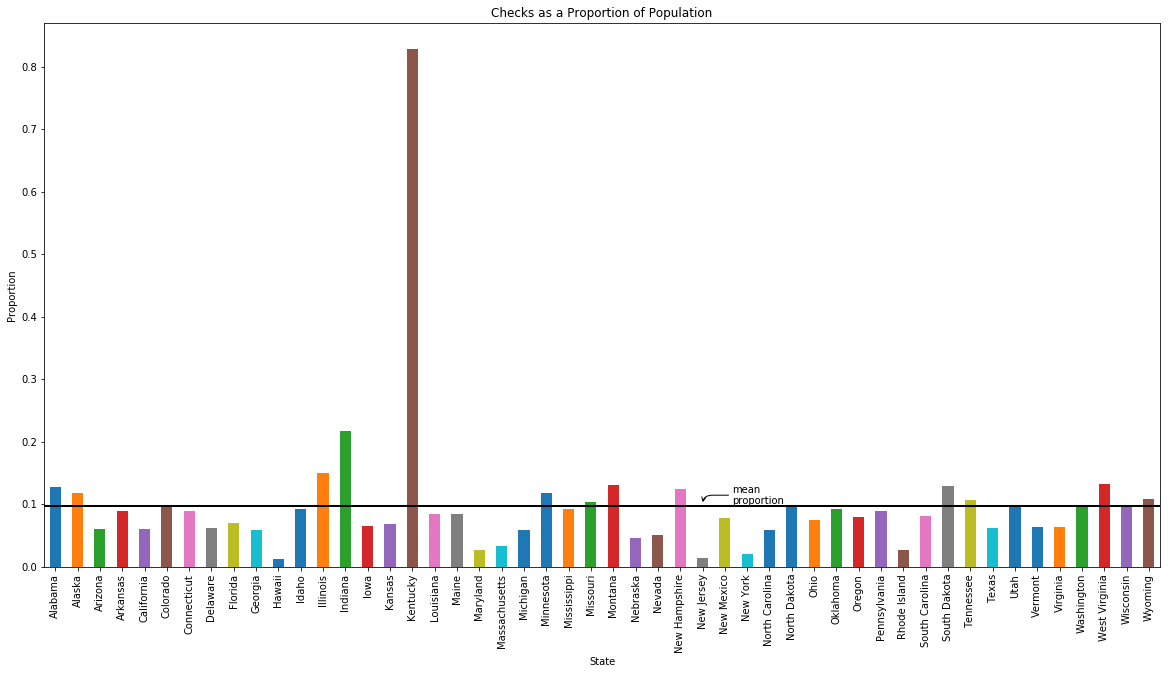

In [106]:
#create dataframe to append porportion column
df2_16_50 = df_16_50.reset_index(drop=True) 

#add population column, create proportion column
df2_16_50['est_pop_72016'] = tcensus1['est_pop_72016']
df2_16_50['proportions'] = df2_16_50['totals']/df2_16_50['est_pop_72016']
labels = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

x = np.arange(len(labels))  # the label locations
width = 0.50  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))

df2_16_50['proportions'].plot(kind='bar');

ax.axhline(df2_16_50['proportions'].mean(), color='black', linewidth=2) #add mean line for reference

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion')
ax.set_xlabel('State')
ax.set_title('Checks as a Proportion of Population')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

# Add arrow annotating the mean:
ax.annotate('mean\nproportion',
            xy=(29, .1), xycoords='data',
            xytext=(30, .2), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.show()

Kentucky has by far the greatest checks as a proportion of population.  Only 12 other states even exceed the mean.

### Research Question 3:  Is there a relationship between median gross rent and the amount of checks?

In [107]:
#get values for plot use
tcensus1['median_rent_2011-2015'].describe()

count      50.000000
mean      879.880000
std       181.106761
min       643.000000
25%       743.500000
50%       818.500000
75%      1001.500000
max      1438.000000
Name: median_rent_2011-2015, dtype: float64

In [108]:
tcensus1.loc[tcensus1['median_rent_2011-2015'] == 1438]

,state,est_pop_72016,pop_change,pop_42010,median_rent_2011-2015,25_hsgrads_2011-2015,25_colgrads_2011-2015,total_assist_2012x1000,poverty,men_firms_2012,women_firms_2012,pop_sqmi_2010
10,Hawaii,1428557,5,1360301,1438,91,30,8136947,9,60409,44453,211


In [109]:
df2_16_50['totals'].describe()

count    5.000000e+01
mean     5.481110e+05
std      6.826073e+05
min      1.668100e+04
25%      1.500798e+05
50%      3.212000e+05
75%      6.159565e+05
max      3.676847e+06
Name: totals, dtype: float64

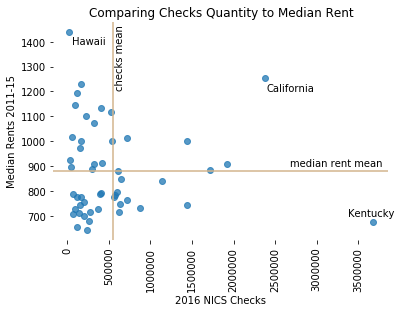

In [110]:
#add rent column to dataframe
df2_16_50['median_rent_2011-2015'] = tcensus1['median_rent_2011-2015'] 

# Draw graph
fig, ax = plt.subplots()
ax.plot(df2_16_50['totals'], df2_16_50['median_rent_2011-2015'], linestyle='', marker='o', alpha=0.75)

# Set titles and labels
for spine in plt.gca().spines.values():
    spine.set_visible(False) #delete outline
ax.set_title('Comparing Checks Quantity to Median Rent')
ax.set_xlabel('2016 NICS Checks')
ax.set_ylabel("Median Rents 2011-15")
plt.axhline(df2_16_50['median_rent_2011-2015'].mean(), color='tan') #use mean as x-axis
plt.axvline(df2_16_50['totals'].mean(), color='tan') #use mean as y-axis
plt.annotate('median rent mean', xy=(2675000, 900)) #annotate x-axis
plt.annotate('checks mean', xy=(569111, 1438), rotation=90) #annotate y-axis
plt.annotate('Kentucky', xy=(3375000, 700))
plt.annotate('Hawaii', xy=(60011, 1390))
plt.annotate('California', xy=(2397167, 1201))
plt.xticks(rotation=90);

The data is somewhat curvelinear, but there does not appear to be a strong correlation.  The relationship is negative as the most expensive median rent is associated with low checks number and highest checks number is associated with a less expensive median rent.

### Research Question 4:  Is there a stronger relationship between the number of women-owned firms or men-owned firms and the amount of checks?

In [111]:
df_12 = nics.query('year == 2012')

#drop territories not represented by the census dataset, as well as "States" column so that it lines up with NICs data
df_12_50 = df_12.drop(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'], level=0)
df_12_50 = df_12_50.reset_index(drop=True)
df_12_50['men_firms_2012'] = tcensus1['men_firms_2012']
df_12_50['women_firms_2012'] = tcensus1['women_firms_2012']

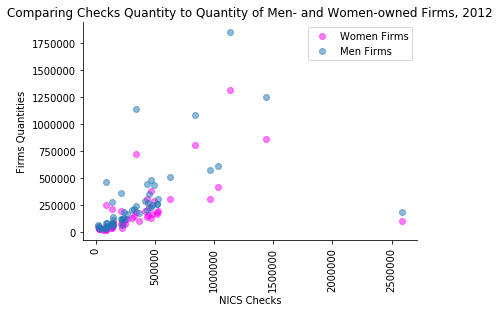

In [112]:
fig, ax = plt.subplots()
ax.plot(df_12_50['totals'], df_12_50['women_firms_2012'], linestyle='', marker='o', label= 'Women Firms', alpha=0.5, color='magenta')
ax.plot(df_12_50['totals'], df_12_50['men_firms_2012'], linestyle='', marker='o', label= 'Men Firms', alpha=0.5)

# Set titles and labels
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.set_title('Comparing Checks Quantity to Quantity of Men- and Women-owned Firms, 2012')
ax.set_xlabel('NICS Checks')
ax.set_ylabel("Firms Quantities")
plt.xticks(rotation=90)

ax.legend();
plt.show()

In [113]:
df_12_50['totals'].corr(df_12_50['women_firms_2012'])

0.50550628885138404

In [114]:
df_12_50['totals'].corr(df_12_50['men_firms_2012'])

0.51477113806024599

There is a positive relationship between checks and firms, but the correlation is only moderate, with men-owned being negligibly stronger.

### Research Question 5:  Do any of my selected data have a strong correlation?

In [115]:
#create function for scatterplots
def nicsplot(column1, column2, leglabel, dot, hue, title, xaxis, yaxis):
    fig, ax = plt.subplots()
    ax.plot(column1, column2, linestyle='', marker='o', label=leglabel, alpha=dot, color=hue)

    # Set titles and labels
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    ax.set_title(title)
    ax.set_xlabel(xaxis)
    ax.set_ylabel(yaxis)
    plt.xticks(rotation=90)

    ax.legend();
    plt.show()

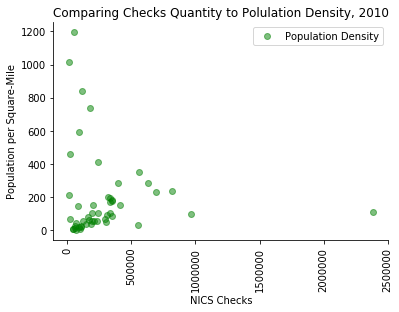

In [116]:
#drop extraneous territories, add column to dataframe
df_10_50 = df_10.drop(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'], level=0)
df2_10_50 = df_10_50.reset_index(drop=True) 
df2_10_50['pop_sqmi_2010'] = tcensus1['pop_sqmi_2010']

#draw graph
nicsplot((df2_10_50['totals']), (df2_10_50['pop_sqmi_2010']), "Population Density", (0.5), "green", 'Comparing Checks Quantity to Polulation Density, 2010', 'NICS Checks', "Population per Square-Mile")

In [117]:
df2_10_50['totals'].corr(df2_10_50['pop_sqmi_2010'])

-0.090373784809616414

There is a weak, negative correlation.

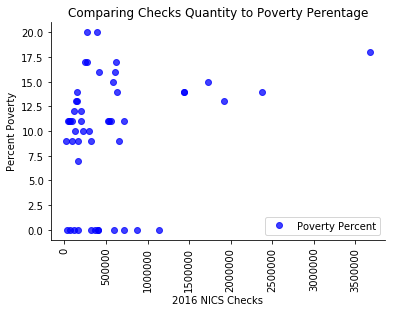

In [120]:
#add column to dataframe
df2_16_50['poverty'] = tcensus1['poverty']

# Draw graph
nicsplot((df2_16_50['totals']), (df2_16_50['poverty']), "Poverty Percent", (0.75), "Blue", 'Comparing Checks Quantity to Poverty Perentage', '2016 NICS Checks', "Percent Poverty")

In [121]:
df2_16_50['totals'].corr(df2_16_50['poverty'])

0.24357019692761372

Another weak correlation.

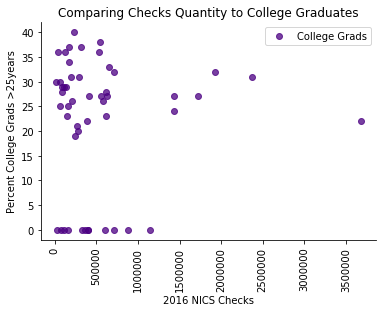

In [122]:
#add column to dataframe
df2_16_50['25_colgrads_2011-2015'] = tcensus1['25_colgrads_2011-2015']

# Draw graph
nicsplot((df2_16_50['totals']), (df2_16_50['25_colgrads_2011-2015']), 'College Grads', (0.75), 'indigo', 'Comparing Checks Quantity to College Graduates', '2016 NICS Checks', "Percent College Grads >25years")

In [123]:
df2_16_50['totals'].corr(df2_16_50['25_colgrads_2011-2015'])

0.032440622292385042

Yet another weak correlation.

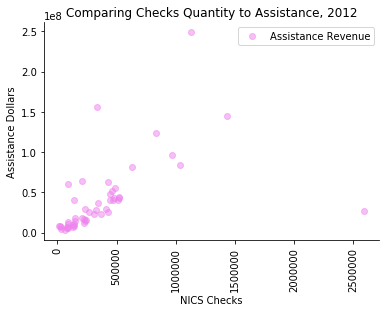

In [124]:
#add column to dataframe
df_12_50['total_assist_2012x1000'] = tcensus1['total_assist_2012x1000']

#Draw graph
nicsplot((df_12_50['totals']), (df_12_50['total_assist_2012x1000']), 'Assistance Revenue', (0.5), 'violet', 'Comparing Checks Quantity to Assistance, 2012', 'NICS Checks', "Assistance Dollars")

In [125]:
df_12_50['totals'].corr(df_12_50['total_assist_2012x1000'])

0.51199453131160255

Okay! There is a moderate positive correlation between the number of checks and the assistance dollars.  States with more/larger social programs might also tend to value background checks.

<a id='conclusions'></a>
## Conclusions

In conclusion, none of my preconceived assumptions about gun data were represented by the background checks data, but one must remember that the background checks are not indicative of a sale one-to-one, and I'm not sure what relationship gun ownership has to background checks (e.g. are background checks more or less prevelant in states with higher rates of gun ownership).

In addition to the background checks not representing sales or gun ownership, the dataset posed limitations with null values for which I assumed it was appropriate to assume actually represented zero background checks of that type.

None of the census data that I selected had a very strong correlation with the NICS data.

The most interesting thing I found in going through the data was the sheer number of checks from Kentucky. Here (https://lawcenter.giffords.org/background-check-procedures-in-kentucky/), I found this information:

"Federal law requires federally licensed firearms dealers (but not private sellers) to initiate a background check on the purchaser prior to sale of a firearm. Federal law provides states with the option of serving as a state “point of contact” and conducting their own background checks using state, as well as federal, records and databases, or having the checks performed by the FBI using only the National Instant Criminal Background Check System (“NICS”) database. (Note that state files are not always included in the federal database.)

Kentucky is not a point of contact state for the NICS.1 Kentucky has no law requiring firearms dealers to initiate background checks prior to transferring a firearm. As a result, in Kentucky firearms dealers must initiate the background check required by federal law by contacting the FBI directly."

This might in part account for the astonishing proportion of Kentucky's NICS background checks.

It was also interesting that handgun-related checks surpassed long-gun-related checks after 2010.  According to Rueters, there was indeed a firearms purchasing surge in 2011. https://www.reuters.com/article/us-usa-firearms-backgroundchecks/fbi-data-shows-spike-in-u-s-firearm-purchases-in-2011-idUSTRE80407P20120105


In [126]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0